In [1]:
import pickle as pkl
import pk_plot_library as pplib

pplib.imports()

In [3]:
ds = pkl.load(open('/Users/cosinga/code/hcolor/fig_md_analysis/8-12_pkdatasort.pkl', 'rb'))

ds.tickArgs(direction = 'in', right = True, top = True, labelsize = 14)
ds.legendArgs(frameon = False, loc = 'upper right', fontsize = 14, slc = (-1, -1))

ds.rowLabelArgs(pos = [0.05, 0.05], fontsize = 16, ha = 'left', va = 'bottom')
ds.colLabelArgs(pos = [0.5, 0.95], fontsize = 16, ha = 'center', va = 'top')

ds.axisArgs(xscale = 'log', yscale = 'log', xlim = [0.11866199299595938, 20])
ds.axisLabelArgs('both', fontsize = 16)

ds.setColors('axis', 'viridis', [0, 1, 2])
ds.displayAs('axis', [0, 1, 2], ['x-axis', 'y-axis', 'z-axis'])

ds.displayAs('HI_fieldname', ['vn', 'hiptl', 'hisubhalo'], ['All Particles', 'Particles in Galaxies', 'Galaxy Centers'])
ds.displayAs('space', ['real', 'redshift', 'rsd'], ['Real Space', 'Redshift Space', 'Redshift Space\nDistortions'])
ds.displayAs('color', ['blue', 'red', 'resolved'], ['Blue Galaxies', 'Red Galaxies', 'All Galaxies'])

ds.setXLabel(pplib.wnum())

In [3]:
ds.getAttrVals('path')

['fiducial',
 'allgals',
 'HIbt',
 'species',
 'galbt',
 'MAS',
 'low-2',
 'colordef',
 'axistest1',
 'convtest',
 'low-3',
 'midgr',
 'axistest2']

# Investigations

## HI Auto

The row values for space: ['real']
The column values for HI_fieldname: ['vn', 'hiptl', 'hisubhalo']


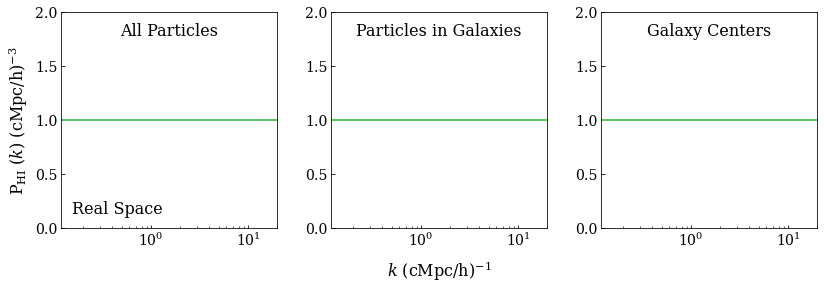

In [4]:
# sanity check to make sure real space is the same
ip = {'is_auto':True, 'HI_fieldname':['vn', 'hiptl', 'hisubhalo'], 'axis':[0, 1, 2],
     'snapshot':99, 'space':'real', 'grid_resolution':800, 
      'path':['fiducial', 'axistest1', 'axistest2'], 'simname':'tng100'}

fg = ds.figrid('axis', 'space', 'HI_fieldname', ip)
fg.autoNorm({'axis':0}, ['model', 'HI_fieldname'])
fg.setYLabel(pplib.pklab('HI'))
fg.axisArgs(ylim = (0, 2), yscale = 'linear')
fg.legendArgs(rm_legend = True)
fg.plot()

The row values for space: ['redshift']
The column values for HI_fieldname: ['vn', 'hiptl', 'hisubhalo']


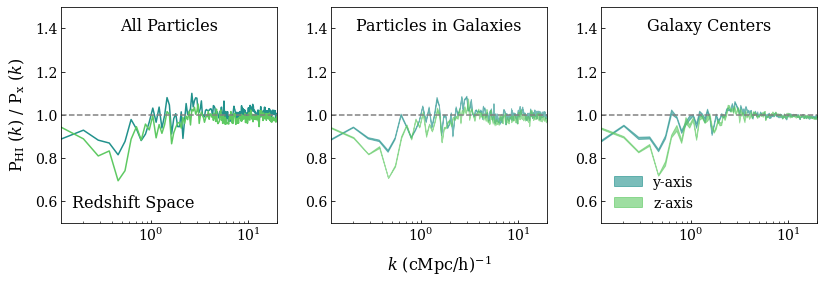

In [5]:
ip['space'] = 'redshift'
fg = ds.figrid('axis', 'space', 'HI_fieldname', ip)
fg.autoNorm({'axis':0}, ['model'])
fg.autoFill(alpha = 0.6)
fg.setYLabel(pplib.pkrat('HI', 'x'))
fg.axisArgs(ylim = (0.5, 1.5), yscale = 'linear')
fg.legendArgs(loc = 'lower left')
fg.plotOnes()
pplib.darkmode(fg)
fg.plot()

* Axis has very little effect here

## Galaxy Auto

The row values for space: ['redshift']
The column values for color: ['blue', 'red', 'resolved']


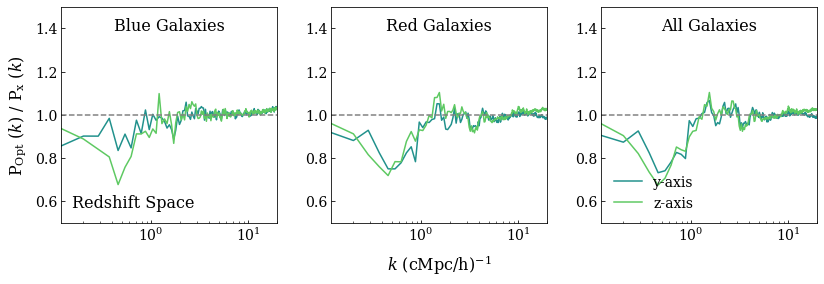

In [6]:
ip = {'is_auto':True, 'fieldname':'galaxy', 'simname':'tng100',
     'snapshot':99, 'space':'redshift', 'grid_resolution':800, 
      'path':['fiducial', 'axistest1', 'axistest2'],
     'gal_res':'diemer', 'color_cut':['0.60', 'None'], 'color':['blue', 'red', 'resolved']}
fg = ds.figrid('axis', 'space', 'color', ip)
fg.autoNorm({'axis':0})
fg.setYLabel(pplib.pkrat('Opt', 'x'))
fg.axisArgs(ylim = (0.5, 1.5), yscale = 'linear')
fg.legendArgs(loc = 'lower left')
fg.plotOnes()
fg.plot()

## Galaxy Dust Auto

The row values for space: ['redshift']
The column values for color: ['blue', 'red', 'resolved']


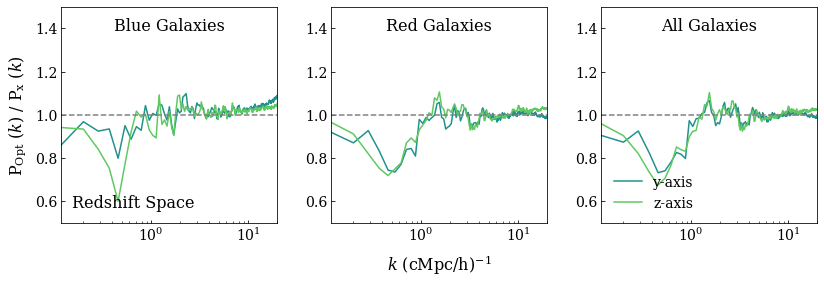

In [7]:
ip = {'is_auto':True, 'fieldname':'galaxy_dust', 'simname':'tng100',
     'snapshot':99, 'space':'redshift', 'grid_resolution':800, 
      'path':['fiducial', 'axistest1', 'axistest2'],
     'gal_res':'diemer', 'color_cut':['0.60', 'None'], 'color':['blue', 'red', 'resolved'],
     'post_process':'no key found'}
fg = ds.figrid('axis', 'space', 'color', ip)
fg.autoNorm({'axis':0})
fg.setYLabel(pplib.pkrat('Opt', 'x'))
fg.axisArgs(ylim = (0.5, 1.5), yscale = 'linear')
fg.legendArgs(loc = 'lower left')
fg.plotOnes()
fg.plot()

## HIxGalaxy

The row values for space: ['redshift']
The column values for color: ['blue', 'red', 'resolved']


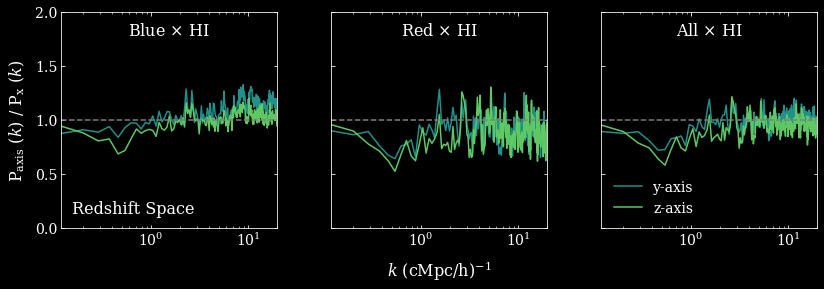

In [35]:
import numpy as np
def fill_mean(ax, data, kwargs):
    x = data[0]
    y = np.mean(np.array([data[1], data[2]]), axis = 0)
    kwargs['alpha'] = 1
    ax.plot(x, y, **kwargs)
    return
WEBPATH = '/Users/cosinga/code/calvinosinga.github.io/papers/higal_cross/images/'

ip = {'is_auto':False, 'HI_fieldname':['vn', 'hiptl'], 'simname':'tng100',
     'snapshot':99, 'space':'redshift', 'grid_resolution':800, 
      'path':['fiducial', 'axistest1', 'axistest2'],
     'gal_res':'diemer', 'color_cut':['0.60', 'None'], 'color':['blue', 'red', 'resolved'],
     'post_process':'no key found'}
fg = ds.figrid('axis', 'space', 'color', ip)
fg.autoNorm({'axis':0})
# ip['axis'] = 0
# ds.printMatching(ip)
fg.autoFill()
fg.setFunc({'figrid_process':'fill'}, fill_mean)
fg.axisArgs(yscale = 'linear', ylim = (0, 2))
fg.plotOnes()
fg.colLabels(['Blue $\\times$ HI', 'Red $\\times$ HI', 'All $\\times$ HI'])
fg.legendArgs(loc = 'lower left')
fg.setYLabel(pplib.pkrat('axis', 'x'))
fg.setDefaultTicksParams()
pplib.darkmode(fg)
fg.plot()
fg.fig.savefig(WEBPATH + 'axis_test_redshift_ratio.png', dpi = 150, facecolor = 'auto', bbox_inches = 'tight')

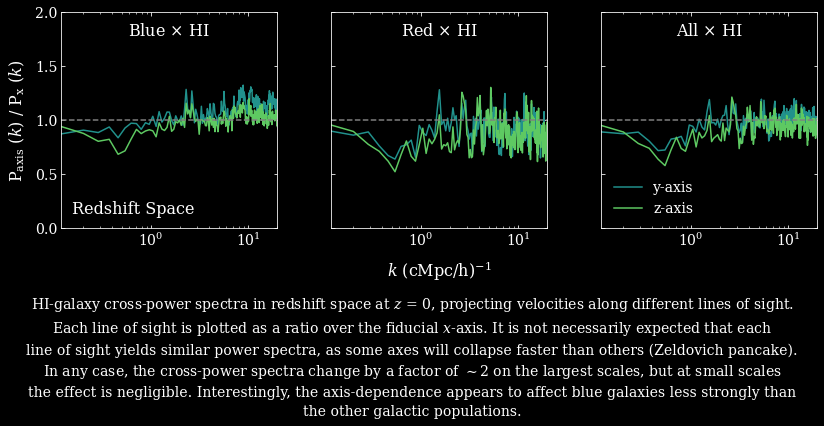

In [36]:
f = open(WEBPATH + 'axis_caption.txt', 'r')
text = f.read()
f.close()
fg.fig.text(0.5, -0.05, text, color = 'white', fontsize = 14, ha = 'center', va = 'top', linespacing = 1.45)
fg.fig.savefig(WEBPATH + 'axis_test_redshift_ratio_caption.png', dpi = 150, facecolor = 'auto', bbox_inches = 'tight')
fg.fig

# Paper Figures

The row values for fieldname: ['galaxy']
The column values for color: ['blue', 'red', 'resolved']


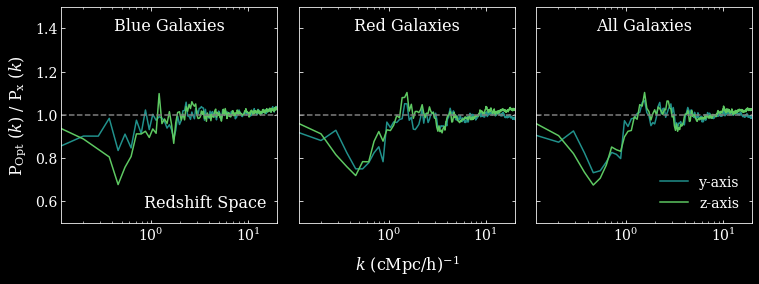

In [4]:
import matplotlib.pyplot as plt
ip = {'is_auto':True, 'fieldname':'galaxy', 'simname':'tng100',
     'snapshot':99, 'space':'redshift', 'grid_resolution':800, 
      'path':['fiducial', 'axistest1', 'axistest2'],
     'gal_res':'diemer', 'color_cut':['0.60', 'None'], 'color':['blue', 'red', 'resolved']}
WEBPATH = '/Users/cosinga/code/calvinosinga.github.io/hicolor/sup_analysis/'
fg = ds.figrid('axis', 'color', 'fieldname', ip)
fg.autoNorm({'axis':0})
fg.setYLabel(pplib.pkrat('Opt', 'x'))
fg.setXLabel(pplib.wnum())
fg.axisArgs(ylim = (0.5, 1.5), yscale = 'linear')
fg.legendArgs(loc = 'lower right')
fg.setDefaultTicksParams()
fg.rowLabels(['Redshift Space'], pos = [0.95, 0.05])
fg.rowLabelArgs(ha = 'right')
fg.gspecArgs(hspace = 0.1, wspace = 0.1, yborder = (0.1, 0.25), xborder = (0.25, 0.1))
pplib.darkmode(fg)
fg.plotOnes()
fg.plot()
# fg.save('/Users/cosinga/code/hicolor_draft/figures/axis_test_redshift_ratio.pdf', dpi = 150)
fg.fig.savefig(WEBPATH + 'images/axis_test_redshift_ratio.png', dpi = 250, facecolor = 'auto', bbox_inches = 'tight')

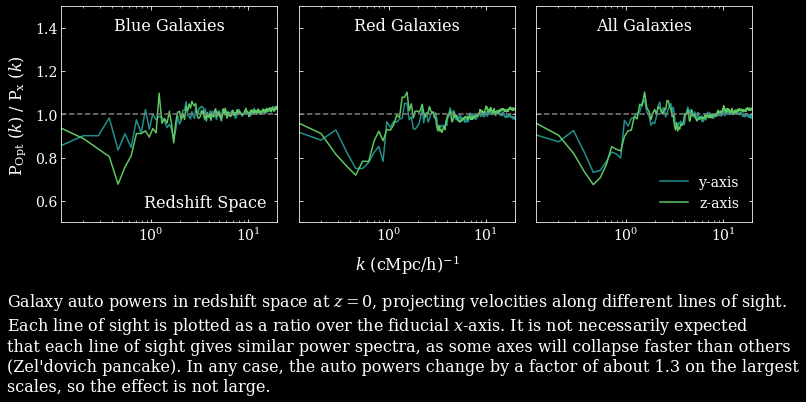

In [5]:
f = open(WEBPATH + 'captions/axis_caption.txt', 'r')
text = f.read()
f.close()
fg.fig.text(0, -0.05, text, color = 'white', fontsize = 16, ha = 'left', va = 'top')
fg.fig.savefig(WEBPATH + 'images/axis_test_redshift_ratio_caption.png', dpi = 250, facecolor = 'auto', bbox_inches = 'tight')
fg.fig

The row values for fieldname: ['galaxy']
The column values for color: ['blue', 'red', 'resolved']


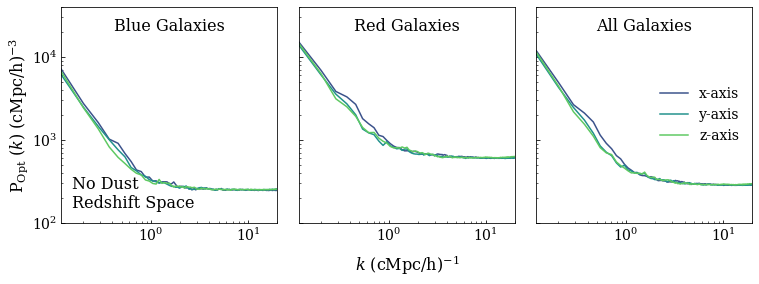

In [13]:
ip = {'is_auto':True, 'fieldname':'galaxy', 'simname':'tng100',
     'snapshot':99, 'space':'redshift', 'grid_resolution':800, 
      'path':['fiducial', 'axistest1', 'axistest2'],
     'gal_res':'diemer', 'color_cut':['0.60', 'None'], 'color':['blue', 'red', 'resolved']}

fg = ds.figrid('axis', 'fieldname', 'color', ip)
fg.setYLabel(pplib.pklab('Opt'))
fg.axisArgs(ylim = (1e2, 4e4))
fg.legendArgs(loc = 'center right')
fg.setDefaultTicksParams()
fg.rowLabels(['No Dust\nRedshift Space'], pos = [0.05, 0.05])
fg.rowLabelArgs(ha = 'left')
fg.gspecArgs(hspace = 0.1, wspace = 0.1)
fg.plot()
fg.save('/Users/cosinga/code/hicolor_draft/figures/axis_test_redshift.pdf', dpi = 150)
fg.save('axis_test_redshift.png', dpi = 150)

The row values for space: ['redshift']
The column values for color: ['blue', 'red', 'resolved']


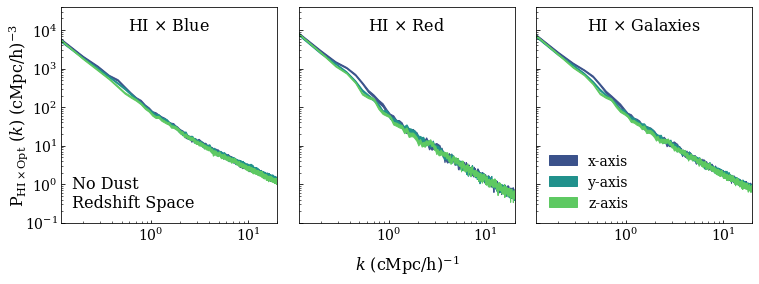

In [8]:
ip = {'is_auto':False, 'HI_fieldname':['vn', 'hiptl'], 'simname':'tng100',
     'snapshot':99, 'space':'redshift', 'grid_resolution':800, 
      'path':['fiducial', 'axistest1', 'axistest2'],
     'gal_res':'diemer', 'color_cut':['0.60', 'None'], 'color':['blue', 'red', 'resolved'],
     'post_process':'no key found'}
fg = ds.figrid('axis', 'space', 'color', ip)
# ip['axis'] = 0
# ds.printMatching(ip)
fg.autoFill()
fg.rowLabels(['No Dust\nRedshift Space'], pos = [0.05, 0.05])
fg.rowLabelArgs(ha = 'left')
fg.colLabels(['HI $\\times$ Blue', 'HI $\\times$ Red', 'HI $\\times$ Galaxies'])
fg.axisArgs(ylim = (.1, 4e4))
fg.setYLabel(pplib.pklab('HI', 'Opt'))
fg.legendArgs(loc = 'lower left')
fg.gspecArgs(wspace = 0.1)
fg.setDefaultTicksParams()
fg.plot()
fg.save('/Users/cosinga/code/hicolor_draft/figures/axis_test_redshift_HIXopt.pdf', dpi = 150)
fg.save('axis_test_redshift_HIXopt.png', dpi = 150)

The row values for space: ['redshift']
The column values for color: ['blue', 'red', 'resolved']


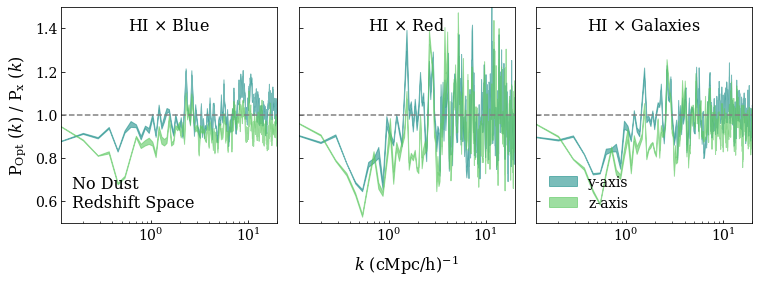

In [20]:
ip = {'is_auto':False, 'HI_fieldname':['vn', 'hiptl'], 'simname':'tng100',
     'snapshot':99, 'space':'redshift', 'grid_resolution':800, 
      'path':['fiducial', 'axistest1', 'axistest2'],
     'gal_res':'diemer', 'color_cut':['0.60', 'None'], 'color':['blue', 'red', 'resolved'],
     'post_process':'no key found'}
fg = ds.figrid('axis', 'space', 'color', ip)
# ip['axis'] = 0
# ds.printMatching(ip)
fg.autoNorm({'axis':0}, ['model', 'HI_fieldname'])
fg.autoFill()
fg.colLabels(['HI $\\times$ Blue', 'HI $\\times$ Red', 'HI $\\times$ Galaxies'])
fg.rowLabels(['No Dust\nRedshift Space'], pos = [0.05, 0.05])
fg.rowLabelArgs(ha = 'left')
fg.setDefaultTicksParams()
fg.setYLabel(pplib.pklab('HI', 'Opt'))
fg.legendArgs(loc = 'lower left')
fg.gspecArgs(hspace = 0.1, wspace = 0.1)
fg.plotOnes()
fg.setYLabel(pplib.pkrat('Opt', 'x'))
fg.axisArgs(ylim = (0.5, 1.5), yscale = 'linear')
fg.plot()
fg.save('/Users/cosinga/code/hicolor_draft/figures/axis_test_redshift_HIXopt_ratio.pdf', dpi = 150)
fg.save('axis_test_redshift_HIXopt_ratio.png', dpi = 150)

The row values for fieldname: ['galaxy_dust']
The column values for color: ['blue', 'red']


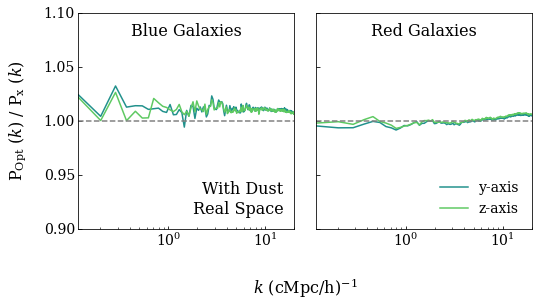

In [12]:
ip = {'is_auto':True, 'fieldname':'galaxy_dust', 'simname':'tng100',
     'snapshot':99, 'space':'real', 'grid_resolution':800, 
      'path':['fiducial', 'axistest1', 'axistest2'],
     'gal_res':'diemer', 'color_cut':['0.60', 'None'], 'color':['blue', 'red']}
fg = ds.figrid('axis', 'fieldname', 'color', ip)
fg.autoNorm({'axis':0})
fg.setYLabel(pplib.pkrat('Opt', 'x'))
fg.axisArgs(ylim = (0.9, 1.1), yscale = 'linear')
fg.legendArgs(loc = 'lower right')
fg.setDefaultTicksParams()
fg.rowLabels(['With Dust\nReal Space'], pos = [0.95, 0.05])
fg.rowLabelArgs(ha = 'right')
fg.gspecArgs(hspace = 0.1, wspace = 0.1)
fg.plotOnes()
fg.plot()
# fg.save('/Users/cosinga/code/hicolor_draft/figures/axis_test_dust.pdf', dpi = 150)
# fg.save('axis_test_dust.png', dpi = 150)